# <span style="color:#0F19C9">Contents</span>

- [Importing and loading data](#importing-and-loading-data)
- [Understanding data](#understanding-data)
- [Multivariable Analysis](#multivariable-analysis)

# <span style="color:#0F19C9">Importing and loading data</span>

Before we start this notebook, we build an Excel File that can be found in the Data folder when we import main components of the MSFT financial statements, including Balance Sheet, Income Statement, Cash Flow Statement and some important Ratios from them. In the second spreadsheet, we keep only the concerning ones to the present analysis.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
from matplotlib import gridspec
import seaborn as sns

In [2]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#D4B037']

# Crear la paleta de colores personalizada
colors = [juan_colors[5], juan_colors[0]]
juan_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [3]:
df = pd.read_excel('../Data/msft_regression_data.xlsx', sheet_name='EBITDA_Model_Data')

# <span style="color:#0F19C9">Understanding data</span>

Even when it is expected, because the Excel file was build manually, we do not find any null value and any duplicates. So we can start with the basic analysis of the different variables to understand the actual size of our analysis.

In [4]:
# Print null and duplicated values
print(f'The original dataframe has {df.isna().sum().sum()} null values and {df.duplicated().sum()} duplicates')

The original dataframe has 0 null values and 0 duplicates


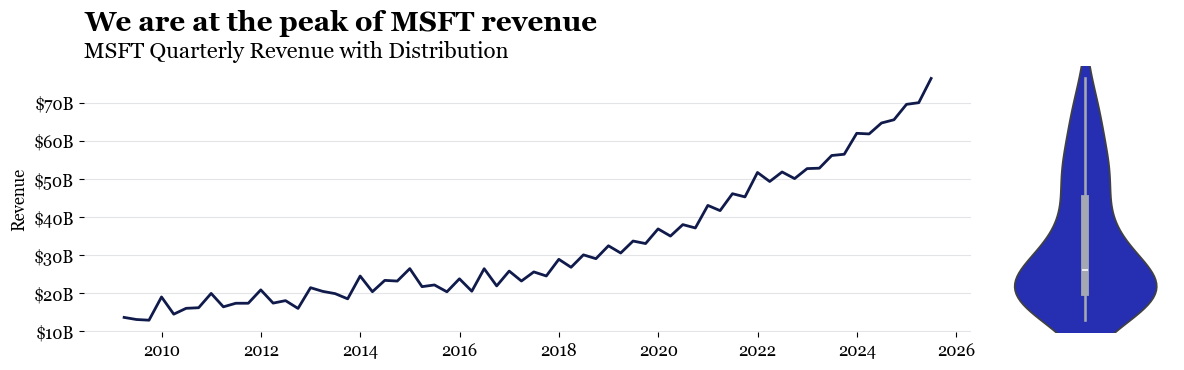

In [5]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('We are at the peak of MSFT revenue',
             x=0.077, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Revenue'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Revenue with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Revenue')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Revenue'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Microsoft’s revenue trajectory over the past decade reflects a powerful blend of strategic foresight and operational excellence. The company has demonstrated sustained growth, accelerating notably after 2015, driven by its pivot to cloud computing, the success of Azure, and the transition of Office to a subscription-based model. Strategic acquisitions like LinkedIn, GitHub, and Activision Blizzard expanded its ecosystem and diversified its revenue streams, while the integration of AI—especially through Copilot and its partnership with OpenAI—has opened new frontiers of monetization. Under Satya Nadella’s leadership, Microsoft embraced a more agile, customer-centric culture, enabling it to anticipate market shifts and scale its most profitable segments. The consistent quarterly increases in revenue, particularly from 2023 onward, underscore the company’s ability to align innovation with business impact, making it one of the most resilient and forward-looking tech giants in the world.

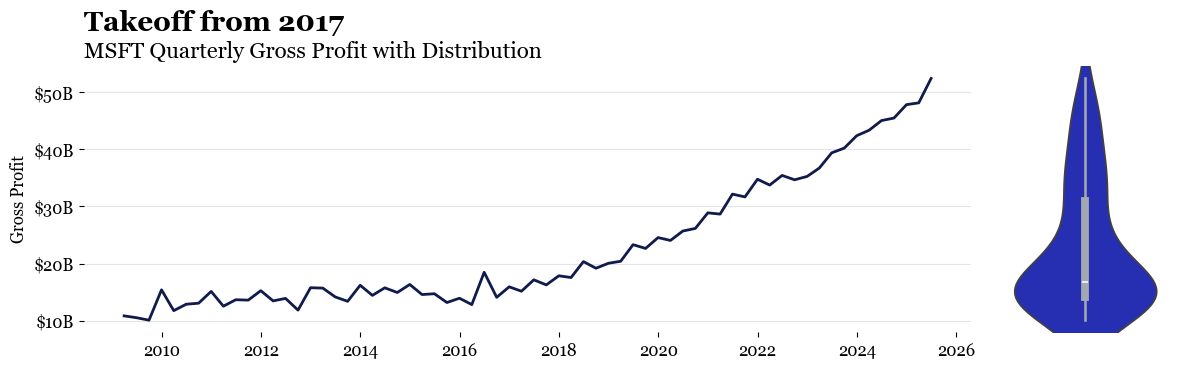

In [6]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Takeoff from 2017',
             x=0.077, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Gross_Profit'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Gross Profit with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Gross Profit')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Gross_Profit'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


Microsoft’s gross profit evolution from 2009 to 2025 reveals a remarkable trajectory of operational efficiency and strategic reinvention. Starting from just over $10 billion in early 2009, gross profit has surged past $52 billion by mid-2025, reflecting not only top-line growth but also disciplined cost management and margin expansion. This upward trend accelerated notably post-2015, as Microsoft shifted its business model toward cloud services and subscription-based offerings, which carry higher margins. The company’s strategic focus on scalable platforms like Azure, Microsoft 365, and enterprise solutions—combined with its integration of AI technologies—has allowed it to optimize infrastructure and reduce unit costs. Additionally, the absorption of high-margin acquisitions and the streamlining of legacy operations have contributed to consistent year-over-year improvements.

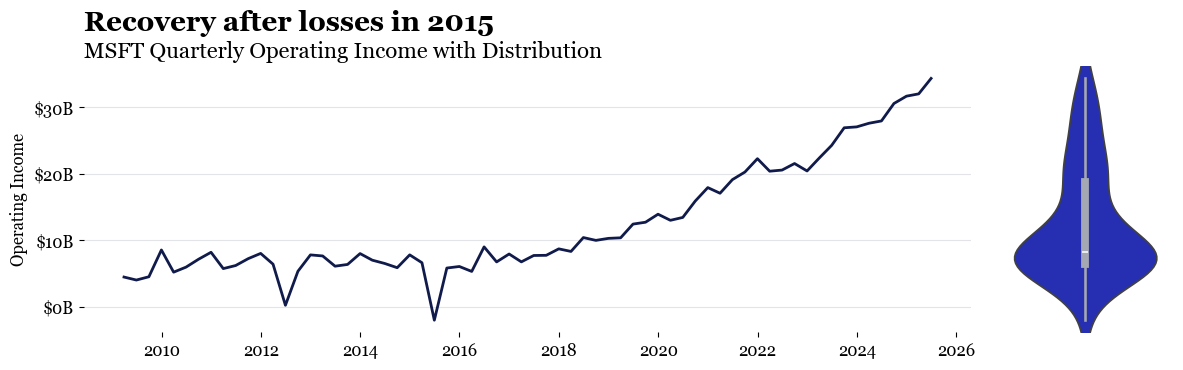

In [7]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Recovery after losses in 2015',
             x=0.077, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Operating_Income'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Operating Income with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Operating Income')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Operating_Income'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Microsoft’s operating income evolution from 2009 to 2025 paints a compelling picture of strategic discipline and financial maturity. From quarterly figures hovering around $4 billion in 2009 to over $34 billion by mid-2025, the company has multiplied its operating efficiency nearly tenfold. This growth has been fueled by a shift toward high-margin cloud services, enterprise software, and subscription models that reduce volatility and enhance predictability. Notably, the post-2020 period shows a sharp upward trajectory, reflecting the impact of AI integration, Copilot adoption, and streamlined cost structures. Even moments of volatility—like the negative operating income in mid-2015—were swiftly corrected through decisive restructuring and portfolio optimization.

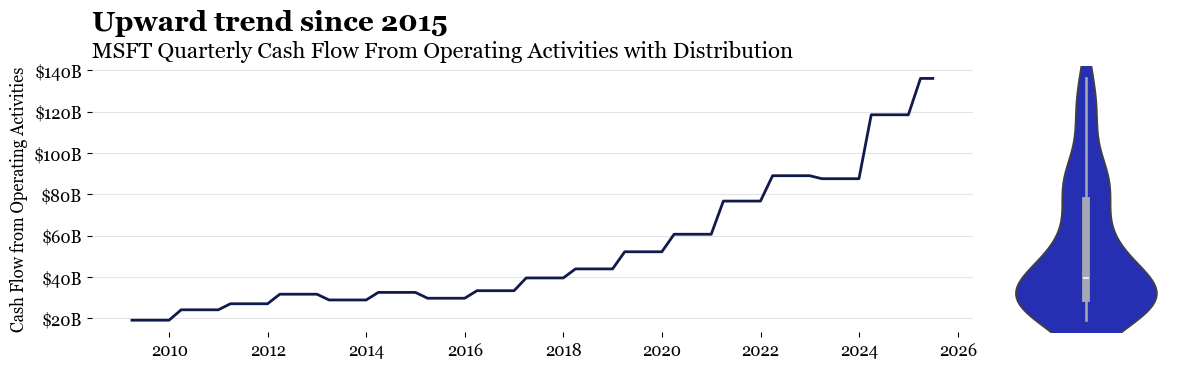

In [8]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
plt.suptitle('Upward trend since 2015',
             x=0.083, y=0.92,
             ha='left', size=20,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Cash_Flow_From_Operating_Activities'], color=juan_colors[0], linewidth=2)
ax0.set_title('MSFT Quarterly Cash Flow From Operating Activities with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Cash Flow from Operating Activities')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Cash_Flow_From_Operating_Activities'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])

# Align the y-axis limits of both plots to ensure the grid aligns perfectly
ax1.set_ylim(ax0.get_ylim())

ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Microsoft’s cash flow from operating activities has shown a powerful and consistent upward trajectory from 2009 to 2025, reflecting the company’s ability to convert revenue into real liquidity with increasing efficiency. Starting at $19 billion in 2009, operating cash flow has grown more than sevenfold, reaching over $136 billion by mid-2025. The post-2020 period marks a dramatic acceleration, driven by the integration of AI across its product suite, the expansion of enterprise cloud services, and disciplined working capital management. The flat quarterly figures in recent years suggest a stable and optimized cash conversion cycle, underscoring Microsoft’s maturity in financial operations. This level of cash generation not only fuels innovation and acquisitions but also provides resilience in volatile markets, positioning Microsoft as one of the most cash-rich and strategically agile companies in the world.

# <span style="color:#0F19C9">Multivariable Analysis</span>

C:\Users\j.ramosb\AppData\Local\Temp\ipykernel_14260\1572079716.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Operating', 'EBIT', 'Pre-Tax', 'Net Profit', 'EBITDA'], rotation=0)


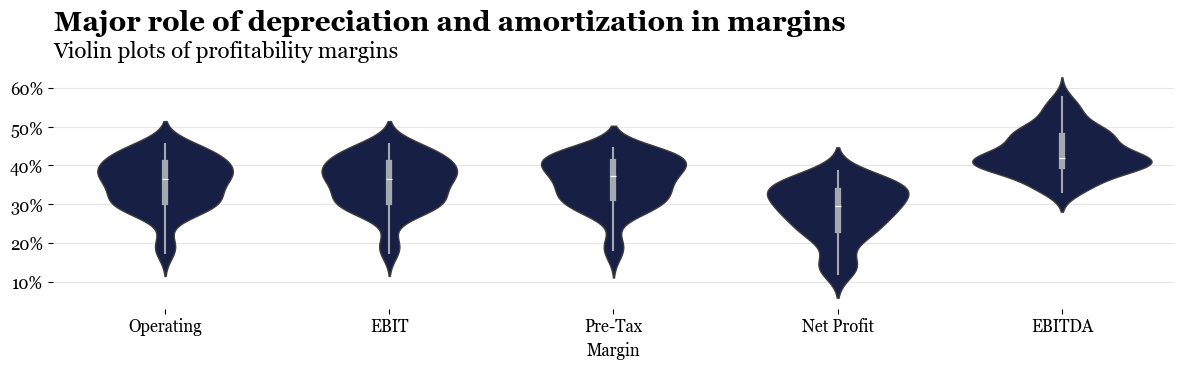

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Major role of depreciation and amortization in margins', 
             ha='left', x=0.052, y=0.92, size=20, weight='bold')
sns.violinplot(data=df[['Operating_Margin', 'EBIT_Margin', 'Pre-Tax_Profit_Margin', 'Net_Profit_Margin', 'EBITDA_Margin']], 
               ax=ax,
               color=juan_colors[0], 
               inner='box', 
               linewidth=1)
for artist in ax.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax.set_title('Violin plots of profitability margins', 
             size=16, loc='left')
ax.set_xlabel('Margin')
ax.set_ylabel('')
formatter_y = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter_y)
ax.set_axisbelow(True)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
ax.set_xticklabels(['Operating', 'EBIT', 'Pre-Tax', 'Net Profit', 'EBITDA'], rotation=0)
plt.tight_layout()
plt.show()

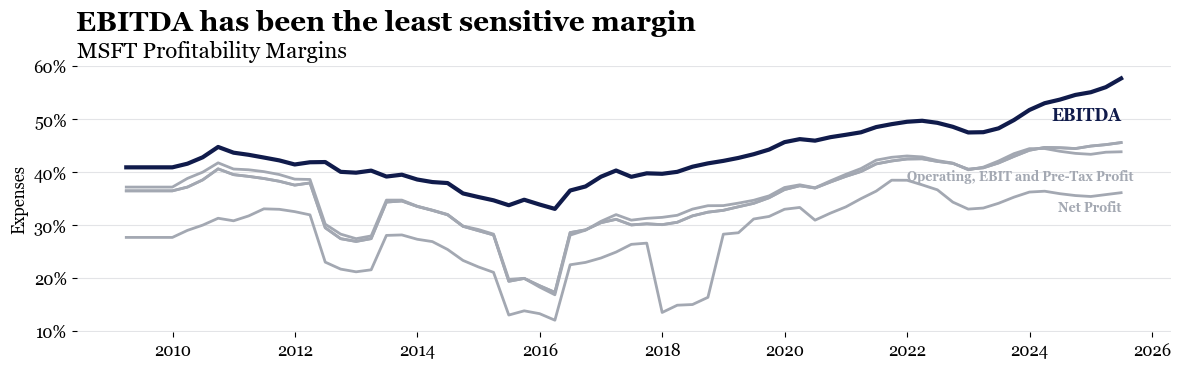

The standard deviation of these margins are:


Operating_Margin         0.067535
EBIT_Margin              0.067535
Pre-Tax_Profit_Margin    0.066798
Net_Profit_Margin        0.071486
EBITDA_Margin            0.057934
dtype: float64

In [10]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('EBITDA has been the least sensitive margin', 
             ha='left', x=0.07, y=0.92, size=20, weight='bold')
ax.set_title('MSFT Profitability Margins', size=16, loc='left')

ax.plot(df['Date'], df['Operating_Margin'], color=juan_colors[2], linewidth=2)
ax.plot(df['Date'], df['EBIT_Margin'], color=juan_colors[2], linewidth=2)
ax.plot(df['Date'], df['Pre-Tax_Profit_Margin'], color=juan_colors[2], linewidth=2)
ax.text(df['Date'].iloc[14], df['Pre-Tax_Profit_Margin'].iloc[1]-0.046, 'Operating, EBIT and Pre-Tax Profit', 
         color=juan_colors[2], ha='left', va='center', fontsize=9, weight='bold')

ax.plot(df['Date'], df['Net_Profit_Margin'], color=juan_colors[2], linewidth=2)
ax.text(df['Date'].iloc[0], df['Net_Profit_Margin'].iloc[1]-0.025, 'Net Profit', 
         color=juan_colors[2], ha='right', va='center', fontsize=9, weight='bold')

ax.plot(df['Date'], df['EBITDA_Margin'], color=juan_colors[0], linewidth=3)
ax.text(df['Date'].iloc[0], df['EBITDA_Margin'].iloc[1]-0.055, 'EBITDA', 
         color=juan_colors[0], ha='right', va='center', fontsize=12, weight='bold')

ax.set_xlabel('')
ax.set_ylabel('Expenses')
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter_y)

plt.tight_layout()
plt.show()

print('The standard deviation of these margins are:')
df[['Operating_Margin', 
    'EBIT_Margin', 
    'Pre-Tax_Profit_Margin', 
    'Net_Profit_Margin',
    'EBITDA_Margin']].std()

Microsoft’s margin behavior from 2009 to 2025 reveals a company that has mastered the art of strategic transformation. In the early years, margins were relatively stable, supported by a traditional licensing model and strong desktop software sales. However, as the tech landscape shifted and cloud computing began to dominate, Microsoft faced the need to reinvent itself. This led to a period of margin compression between 2015 and 2017, where operating and net profit margins dropped significantly. The company absorbed the financial impact of restructuring legacy divisions, investing heavily in Azure infrastructure, and acquiring LinkedIn—all moves that temporarily strained profitability but were essential for repositioning the business.

During this compression phase, EBITDA margins also declined, reflecting the upfront costs of building scalable platforms and transitioning to subscription-based services. Yet, this was not a sign of weakness—it was a calculated sacrifice. Microsoft’s leadership, under Satya Nadella, chose to prioritize long-term value creation over short-term earnings. The company shifted its focus from consumer hardware and perpetual licenses to enterprise cloud solutions, productivity software, and developer ecosystems. These decisions began to pay off by 2018, as margins started expanding across the board, signaling the success of its new operating model.

From 2018 onward, Microsoft entered a phase of sustained margin expansion. Operating margins rose steadily, surpassing 45% by 2025, while EBITDA margins climbed above 57%, showcasing strong operating leverage and cost efficiency. Net profit margins also recovered and stabilized above 35%, reflecting improved tax strategies and reduced below-the-line expenses. The spread between EBITDA and net profit widened, indicating effective management of depreciation and amortization, while the narrowing gap between pre-tax and net margins suggested optimized geographic revenue distribution and tax planning. These trends highlight Microsoft’s ability to convert top-line growth into bottom-line strength with increasing precision.

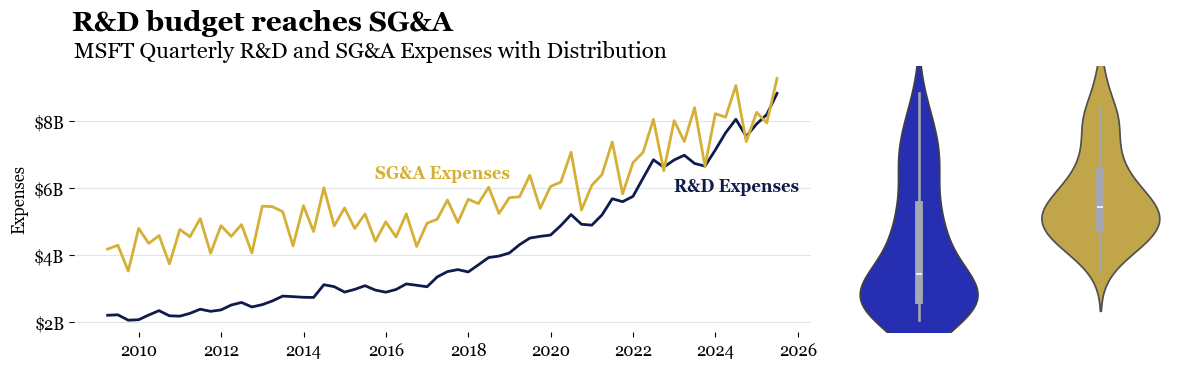

In [11]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 1, 1])
plt.suptitle('R&D budget reaches SG&A', x=0.067, y=0.92,
             ha='left', size=20, weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)
ax2 = fig.add_subplot(gs[2])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['R&D_Expenses'], color=juan_colors[0], linewidth=2)
ax0.plot(df['Date'], df['SG&A_Expenses'], color=juan_colors[5], linewidth=2)
ax0.set_title('MSFT Quarterly R&D and SG&A Expenses with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Expenses')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)
ax0.text(df['Date'].iloc[10], df['R&D_Expenses'].iloc[10] - 0.8e9, 'R&D Expenses', 
         color=juan_colors[0], ha='left', va='center', fontsize=12, weight='bold')
ax0.text(df['Date'].iloc[39], df['SG&A_Expenses'].iloc[40] + 1.2e9, 'SG&A Expenses', 
         color=juan_colors[5], ha='left', va='center', fontsize=12, weight='bold')

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['R&D_Expenses'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax1.set_ylim(ax0.get_ylim())
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

sns.violinplot(y=df['SG&A_Expenses'], ax=ax2,
               color=juan_colors[5],
               inner='box')
for artist in ax2.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax2.set_ylim(ax0.get_ylim())
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

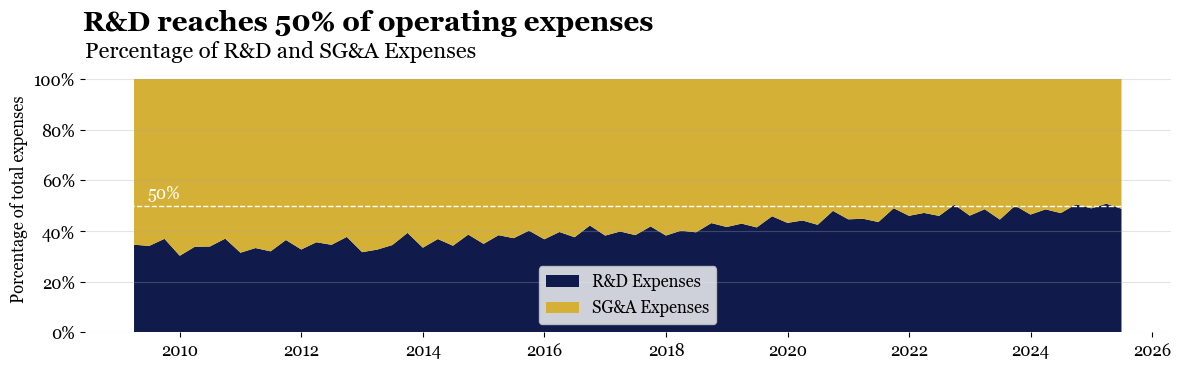

In [12]:
# Create the percentages
df_expenses = df[['Date', 'R&D_Expenses', 'SG&A_Expenses', 'Revenue']].copy()
df_expenses['Total_Expenses'] = df_expenses['R&D_Expenses'] + df_expenses['SG&A_Expenses']
df_expenses['R&D_Expenses_%'] = df_expenses['R&D_Expenses']/df_expenses['Total_Expenses']
df_expenses['SG&A_Expenses_%'] = df_expenses['SG&A_Expenses']/df_expenses['Total_Expenses']

fig, ax = plt.subplots(figsize=(12, 4))
plt.suptitle('R&D reaches 50% of operating expenses', x=0.076, y=0.92,
             ha='left', size=20, weight='bold')
ax.stackplot(
    df_expenses['Date'],
    df_expenses['R&D_Expenses_%'],
    df_expenses['SG&A_Expenses_%'],
    labels=['R&D Expenses', 'SG&A Expenses'],
    colors=[juan_colors[0], juan_colors[5]],
    alpha=1
)
ax.axhline(0.5, color='white', linestyle='--', linewidth=1)
ax.text(df_expenses['Date'].iloc[-4], 0.53, '50%', color='white', ha='right')
ax.set_title('Percentage of R&D and SG&A Expenses', size=16, loc='left')
ax.set_ylabel('Porcentage of total expenses')
ax.set_xlabel('')
ax.legend()
formatter = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()

Microsoft’s historical relationship between R&D and SG&A expenses reveals a strategic rebalancing of priorities over time. In the early years—particularly from 2009 to 2014—SG&A consistently dominated, often representing over 65% of the combined total, while R&D hovered near 30–35%. This reflects a period where Microsoft was still heavily reliant on traditional sales channels, marketing efforts, and global expansion to drive growth. Innovation was present, but not yet the core engine. However, as the company shifted toward cloud computing, AI, and developer ecosystems, the proportion of R&D began to rise. By 2021, R&D had crossed the 45% threshold, and in several quarters between 2022 and 2025, it even surpassed SG&A—marking a profound strategic pivot toward technology-led growth.

This evolving ratio tells us more than just cost allocation—it signals Microsoft’s transformation into a product-first, platform-centric enterprise. The near parity between R&D and SG&A in recent years (e.g., 2023–2025) reflects a mature balance: investing deeply in innovation while maintaining lean, efficient go-to-market operations. When R&D briefly overtakes SG&A, it often aligns with major technological pushes—such as the rollout of Copilot, AI integration across Microsoft 365, or advancements in Azure. Conversely, spikes in SG&A tend to coincide with acquisitions, global campaigns, or customer onboarding efforts. The consequence of this shift is clear: Microsoft has built a scalable, innovation-driven model that fuels margin expansion, strengthens competitive moats, and ensures long-term resilience.

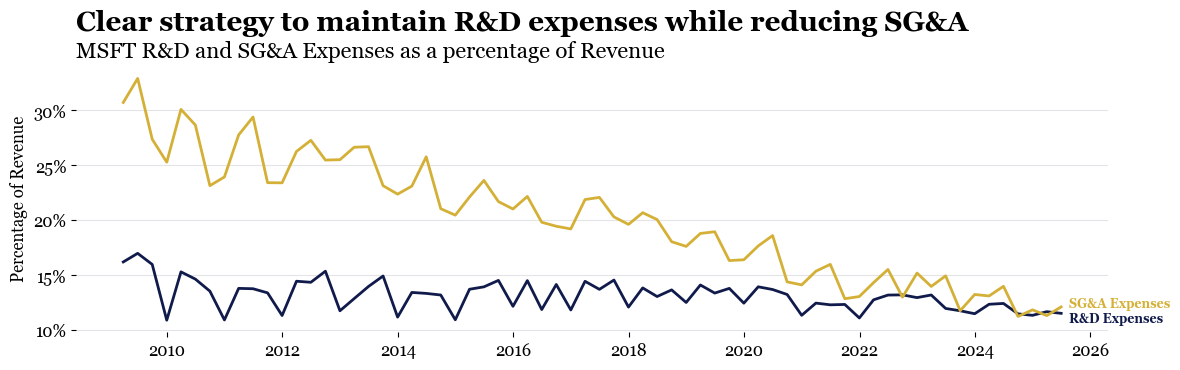

In [13]:
df_expenses['R&D_Expenses_%'] = df_expenses['R&D_Expenses']/df_expenses['Revenue']
df_expenses['SG&A_Expenses_%'] = df_expenses['SG&A_Expenses']/df_expenses['Revenue']
df_expenses

# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Clear strategy to maintain R&D expenses while reducing SG&A', 
             ha='left', x=0.07, y=0.92, size=20, weight='bold')
ax.set_title('MSFT R&D and SG&A Expenses as a percentage of Revenue', size=16, loc='left')

ax.plot(df_expenses['Date'], df_expenses['R&D_Expenses_%'], color=juan_colors[0], linewidth=2)
ax.plot(df_expenses['Date'], df_expenses['SG&A_Expenses_%'], color=juan_colors[5], linewidth=2)
ax.text(df_expenses['Date'].iloc[1] + pd.Timedelta(weeks=20), df_expenses['R&D_Expenses_%'].iloc[1]-0.007, 'R&D Expenses', 
         color=juan_colors[0], ha='left', va='center', fontsize=9, weight='bold')
ax.text(df_expenses['Date'].iloc[1] + pd.Timedelta(weeks=20), df_expenses['R&D_Expenses_%'].iloc[1]+0.007, 'SG&A Expenses', 
         color=juan_colors[5], ha='left', va='center', fontsize=9, weight='bold')

ax.set_xlabel('')
ax.set_ylabel('Percentage of Revenue')
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(formatter_y)

plt.tight_layout()
plt.show()

When R&D and SG&A expenses are viewed as a percentage of revenue, a clearer picture emerges of Microsoft’s evolving cost discipline and strategic focus. Historically, SG&A consumed a significantly larger share of revenue—often exceeding 25–30% in the early 2010s—while R&D hovered around 10–15%. This imbalance reflected a business model still reliant on traditional sales, marketing, and distribution channels. However, over the past decade, SG&A as a percentage of revenue has steadily declined, while R&D has remained relatively stable or even increased slightly. By 2025, both metrics converge near 11–12%, signaling a more balanced and efficient allocation of resources. This shift suggests that Microsoft has streamlined its commercial operations while doubling down on innovation, allowing it to scale revenue without proportionally increasing overhead.

Strategically, this convergence is a hallmark of a mature tech company that has transitioned from selling products to building platforms. The reduction in SG&A intensity implies greater reliance on digital channels, subscription models, and ecosystem-driven growth, which require less direct selling effort. Meanwhile, the sustained investment in R&D—even during periods of margin pressure—demonstrates a long-term commitment to technological leadership. The fact that R&D now rivals SG&A in proportional weight underscores Microsoft’s confidence in innovation as its primary growth engine. In essence, the company has reoriented its cost structure to favor scalability, resilience, and future readiness—transforming operational efficiency into a competitive advantage.

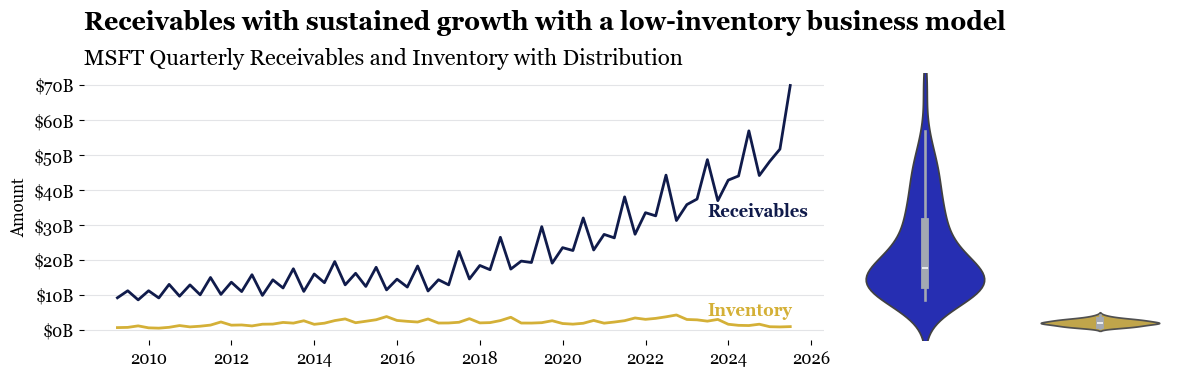

In [14]:
# Create the figure and subplots with gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[5, 1, 1])
plt.suptitle('Receivables with sustained growth with a low-inventory business model',
             x=0.077, y=0.94,
             ha='left', size=18,
             weight='bold')
ax0 = fig.add_subplot(gs[0])  # Left subplot (line plot)
ax1 = fig.add_subplot(gs[1])  # Right subplot (violin plot)
ax2 = fig.add_subplot(gs[2])  # Right subplot (violin plot)

# --- Line Plot (ax0) ---
ax0.plot(df['Date'], df['Receivables'], color=juan_colors[0], linewidth=2)
ax0.plot(df['Date'], df['Inventory'], color=juan_colors[5], linewidth=2)
ax0.set_title('MSFT Quarterly Receivables and Inventory with Distribution', size=16, loc='left')
ax0.set_xlabel('')
ax0.set_ylabel('Amount')
ax0.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax0.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax0.yaxis.set_major_formatter(formatter_y)
ax0.text(df['Date'].iloc[8], df['Receivables'].iloc[8] - 15e9, 'Receivables', 
         color=juan_colors[0], ha='left', va='center', fontsize=12, weight='bold')
ax0.text(df['Date'].iloc[8], df['Inventory'].iloc[8] + 3e9, 'Inventory', 
         color=juan_colors[5], ha='left', va='center', fontsize=12, weight='bold')

# --- Violin Plot (ax1) ---
sns.violinplot(y=df['Receivables'], ax=ax1,
               color=juan_colors[4],
               inner='box')
for artist in ax1.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax1.set_ylim(ax0.get_ylim())
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

sns.violinplot(y=df['Inventory'], ax=ax2,
               color=juan_colors[5],
               inner='box')
for artist in ax2.get_children():
    if isinstance(artist, plt.Line2D) and artist.get_linestyle() == '-':
        artist.set_color(juan_colors[2])
ax2.set_ylim(ax0.get_ylim())
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Over time, the strategic relationship between receivables and inventory reveals a shift in operational efficiency and sales dynamics. While inventory levels have fluctuated moderately, receivables have grown substantially, especially in recent years, indicating stronger sales volumes and extended credit terms. This divergence suggests that the company has optimized its supply chain, reducing excess inventory while accelerating revenue generation through more aggressive customer acquisition or longer payment cycles. The consistent rise in receivables relative to inventory also reflects a transition toward services or digital products, which require less physical stock but generate higher receivable balances—ultimately signaling a leaner, more scalable business model.

In [15]:
print(f'Pearson correlation coeficient between Revenue and Receivables: {df['Revenue'].corr(df['Receivables'])}')

Pearson correlation coeficient between Revenue and Receivables: 0.9627428742492226


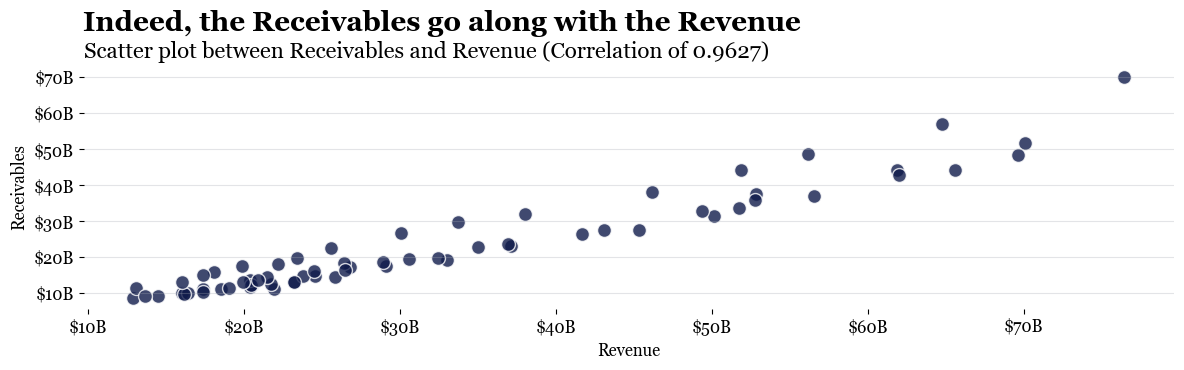

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('Indeed, the Receivables go along with the Revenue', 
             ha='left', x=0.076, y=0.92, size=20, weight='bold')
ax.scatter(df['Revenue'], df['Receivables'], 
           color=juan_colors[0], s=100, alpha=0.8, edgecolor='white')
ax.set_title('Scatter plot between Receivables and Revenue (Correlation of 0.9627)', 
             size=16, loc='left')
ax.set_xlabel('Revenue')
ax.set_ylabel('Receivables')
formatter_x = mtick.FuncFormatter(lambda x, p: f'${x/1e9:,.0f}B')
ax.xaxis.set_major_formatter(formatter_x)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax.yaxis.set_major_formatter(formatter_y)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

The remarkably high Pearson correlation of 0.9627 between revenue and receivables over time suggests a tightly linked operational rhythm where sales growth is consistently accompanied by proportional increases in outstanding customer payments. This alignment reflects a business model heavily reliant on credit sales, indicating both strong demand and a deliberate strategy to extend payment terms to drive volume. However, while this correlation signals healthy top-line expansion, it also implies potential liquidity risks if receivables grow faster than collections.

In [17]:
print(f'Pearson correlation coeficient between Revenue and Receivables: {df['EBITDA'].corr(df['Cash_Flow_From_Operating_Activities'])}')

Pearson correlation coeficient between Revenue and Receivables: 0.9824361025422608


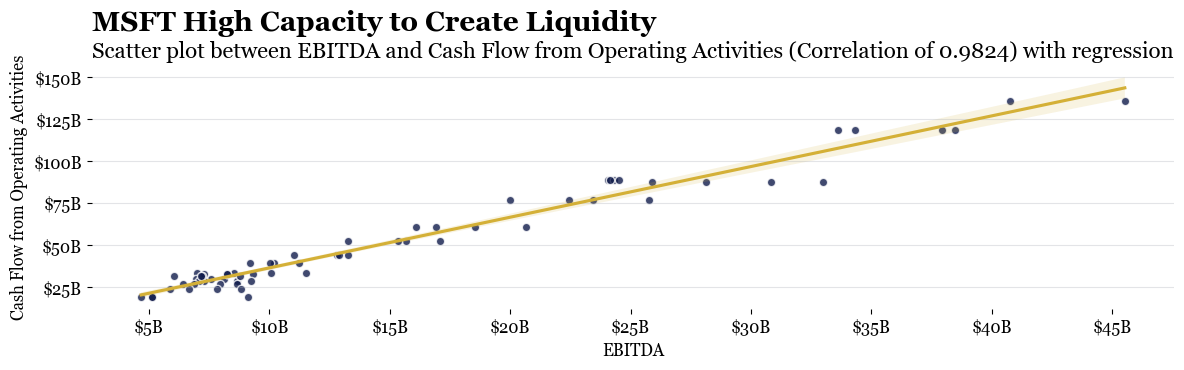

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle('MSFT High Capacity to Create Liquidity', 
             ha='left', x=0.083, y=0.92, size=20, weight='bold')
sns.regplot(data=df, x='EBITDA', y='Cash_Flow_From_Operating_Activities',
            ax=ax, color=juan_colors[0],
            scatter_kws={'edgecolor': 'white', 'linewidths': 1},
            line_kws={'color': juan_colors[5]})
ax.set_title('Scatter plot between EBITDA and Cash Flow from Operating Activities (Correlation of 0.9824) with regression', 
             size=16, loc='left')
ax.set_xlabel('EBITDA')
ax.set_ylabel('Cash Flow from Operating Activities')
formatter_x = mtick.FuncFormatter(lambda x, p: f'${x/1e9:,.0f}B')
ax.xaxis.set_major_formatter(formatter_x)
formatter_y = mtick.FuncFormatter(lambda y, p: f'${y/1e9:,.0f}B')
ax.yaxis.set_major_formatter(formatter_y)
ax.grid(True, color=juan_colors[2], axis='y', alpha=0.3)
ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

A Pearson correlation of 0.9824 between EBITDA and operating cash flow reveals an exceptionally strong relationship between operational profitability and actual cash generation. This means the company efficiently converts its earnings before interest, taxes, depreciation, and amortization into real cash, reflecting a robust and transparent financial structure. Essentially, what the business earns through its core operations is almost immediately mirrored in its cash reserves, a clear sign of operational strength.

Such alignment also suggests minimal distortion from accounting adjustments and a high capacity to generate liquidity without relying heavily on external financing. The company appears well-positioned to meet its obligations, invest in growth, and maintain financial stability.